In [11]:
import matplotlib.pyplot as plt
from L_sys.rules import (
    LSystem,
    DragonCurve,
    Sierpinski
)

In [26]:
def plot_state(
    class_: LSystem,
    num_iters: int,
    initial_state: str | None = None,
    heading: float = 90,
    length: float = 1,
    ax=None
):
    if ax is None:
        fig = plt.figure(figsize=(10, 5))
        ax = fig.add_subplot(111)

    class_.plot(
        class_.grow(initial_state, num_iters),
        heading=heading, length=length,
        ax=ax
    )
    ax.set_aspect('equal')
    return ax

# Dragon Curve

We can use the built-in ruleset 

100%|██████████| 10/10 [00:00<00:00, 27943.40it/s]


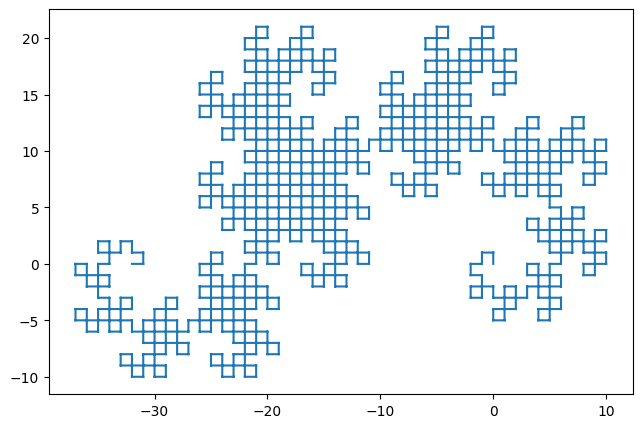

In [17]:
plot_state(DragonCurve, 10);

However, we can also easily define a new one. Here's an alternative ruleset to the Dragon Curve

100%|██████████| 8/8 [00:00<00:00, 12681.19it/s]


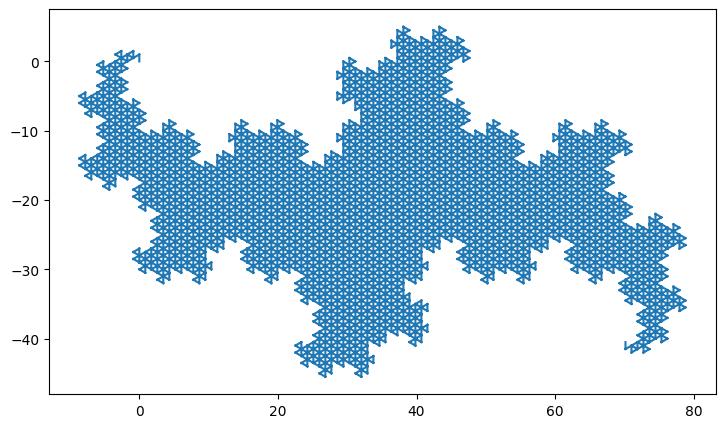

In [19]:
class DragonCurve2(LSystem):
    rules = {
        'F': 'F+F-F'
    }
    turning_angle=120
    initial_state='F'
plot_state(DragonCurve2, 8);

# Sierpinski Triangle

In [23]:
class Sierpinski2(LSystem):
    rules = {
        'F': 'F-G+F+G-F',
        'G': 'GG'
    }
    turning_angle=120
    initial_state='F-G-G'

100%|██████████| 6/6 [00:00<00:00, 18382.63it/s]


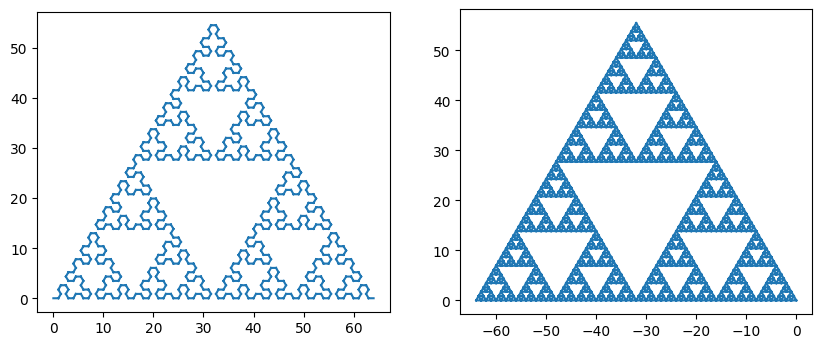

In [33]:
num_iters = 6

fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(1, 2)

plot_state(Sierpinski, num_iters, heading=0, ax=axes[0])
plot_state(Sierpinski2, num_iters, heading=180, ax=axes[1]);